<a href="https://colab.research.google.com/github/pkboom/metacode-machine-learning/blob/master/%5Bassignment%5D_Tree_GridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic setting
import os
import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# [과제] 최적의 Decision Tree 모델 찾기

---

## 본 과제의 목표는 다음과 같음

1. Decision Tree 모델을 사이킷런 패키지를 이용해 정의할 수 있음
2. `GridSearchCV` 클래스를 이용하여, 가장 높은 성능과 최적의 하이퍼파라미터를 찾을 수 있음

## [P.1] GridSearchCV 클래스를 이용하여 최적의 모델 찾기

이전 과제에서 사용했던 `GridSearchCV` 클래스를 활용해 해당 데이터에 가장 좋은 성능을 보여주는 모델 찾기

In [ ]:
# don't change the option
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
def plot_dataset(X, y, show=True):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 's')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], '^')
    # plt.plot(X[:, 0][y==2], X[:, 1][y==2], 'o')

    if show:
      plt.show()

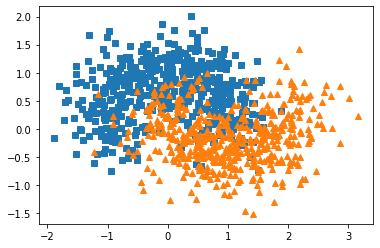

In [ ]:
plot_dataset(X, y)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [3, 5, 10, 15, 20, 100],
    'max_leaf_nodes': [10, 20, 30, 100],
    'min_samples_split': [10, 50, 100, 200]
}

grid_search_cv = GridSearchCV(tree_clf, param_grid)
grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, 15, 20, 100],
                         'max_leaf_nodes': [10, 20, 30, 100],
                         'min_samples_split': [10, 50, 100, 200]})

In [ ]:
# get detailed results of cross-validation
grid_search_cv.cv_results_

In [ ]:
# get the best estimator
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10, min_samples_split=10,
                       random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.88

In [ ]:
def plot_decision_boundary(clf, axes=None):
  if axes is None:
    x0 = np.linspace(-2, 4, 100)
    x1 = np.linspace(-2, 2.5, 100)
  else:
    x0 = np.linspace(axes[0][0], axes[0][1], 100)
    x1 = np.linspace(axes[1][0], axes[1][1], 100)

  x0, x1 = np. meshgrid(x0, x1)
  X_new = np.c_[x0.ravel(), x1.ravel()]

  y_pred = clf.predict(X_new).reshape(x0.shape)

  plt.contourf(x0, x1, y_pred, alpha=0.25)
  plt.show()

In [ ]:
a = np.array([[0, 1, 2], [3, 4, 5]])
# print(np.r_['0,1,-1', a, a])
print(np.c_[a, a])
print(np.c_[[1,2,3], [4,5,6]]) # [1 2 3 4 5 6]
print(np.arange(10))
print(np.c_[np.arange(10)])

In [ ]:
# print('-----', np.r_['0', [1,2,3], [4,5,6]]) # [1 2 3 4 5 6]
# print('-----', np.r_['0,2,0', [1,2,3], [4,5,6]]) # (N, 1)
# print('-----', np.r_['0,2', [1,2,3], [4,5,6]]) # z default = -1
# print('-----', np.r_['0,2,-1', [1,2,3], [4,5,6]])
# print('-----', np.r_['0,2,1', [1,2,3], [4,5,6]])
# print('-----', np.r_['1', [1,2,3], [4,5,6]])
# print('-----', np.r_['1,2', [1,2,3], [4,5,6]])
# print('-----', np.r_['1,2,0', [1,2,3], [4,5,6]])
# print('-----', np.r_['1,2,1', [1,2,3], [4,5,6]])
print('-----', np.r_[[1,2,3], [4,5,6]])
print('-----', np.r_['-1,2,0',[1,2,3], [4,5,6]])
print('-----', np.r_['-1,2',[1,2,3], [4,5,6]])
# print('-----', np.array([1,2,3,4,5,6]).shape)
# print('-----', np.array([1,2,3,4,5,6]).reshape(6,1))
# print('-----', np.array([[1,2,3], [1,2,3]]).shape)
# print('-----', np.array([[1,2,3], [1,2,3]]).shape)

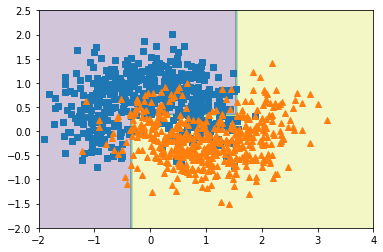

In [ ]:
plt.figure(figsize=(6, 4))

plot_dataset(X, y, False)
plot_decision_boundary(grid_search_cv)

plt.show()